In [147]:
import numpy as np
import pandas as pd
# !pip install pycountry
import pycountry
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [148]:
df = pd.read_csv("processed data/merged.csv")
columns = ['country_or_area',
           'year',
           'Electricity - Gross production',
           'Electricity - total hydro production',
           'Electricity - total nuclear production',
           'Electricity - total solar production',
           'Electricity - total wind production']
sdf = df[columns].copy()
sdf = sdf.fillna(0)
sdf

,country_or_area,year,Electricity - Gross production,Electricity - total hydro production,Electricity - total nuclear production,Electricity - total solar production,Electricity - total wind production
0,Australia,1991,156818.0,16103.0,0.0,0.0,0.0
1,Australia,1992,159545.0,15768.0,0.0,0.0,0.0
2,Australia,1993,163650.0,16953.0,0.0,11.0,0.0
3,Australia,1994,167463.0,16649.0,0.0,13.0,4.0
4,Australia,1995,173159.0,16239.0,0.0,16.0,7.0
...,...,...,...,...,...,...,...
813,United States,2009,4188214.0,298410.0,830210.0,2514.0,74226.0
814,United States,2010,4378422.0,286333.0,838931.0,3934.0,95148.0
815,United States,2011,4349571.0,344679.0,821405.0,6153.0,120854.0
816,United States,2012,4290660.0,298287.0,801129.0,10145.0,141922.0


In [149]:
# Calculate percentage of each production column for each row
sdf['% Hydro Production'] = (sdf['Electricity - total hydro production'] / sdf['Electricity - Gross production']) * 100
sdf['% Nuclear Production'] = (sdf['Electricity - total nuclear production'] / sdf['Electricity - Gross production']) * 100
sdf['% Solar Production'] = (sdf['Electricity - total solar production'] / sdf['Electricity - Gross production']) * 100
sdf['% Wind Production'] = (sdf['Electricity - total wind production'] / sdf['Electricity - Gross production']) * 100
sdf['% Clean Energy'] = (sdf['% Hydro Production']+sdf['% Nuclear Production']+sdf['% Solar Production']+sdf['% Wind Production'])

sdf.drop(columns=['Electricity - total hydro production', 
                 'Electricity - total nuclear production', 
                 'Electricity - total solar production', 
                 'Electricity - total wind production'], inplace=True)

sdf['country_or_area'] = sdf['country_or_area'].apply(lambda country : pycountry.countries.lookup(country).alpha_3 if country != 'Turkey' else 'TUR')
sdf.rename(columns={'country_or_area': 'country'}, inplace=True)

sdf


,country,year,Electricity - Gross production,% Hydro Production,% Nuclear Production,% Solar Production,% Wind Production,% Clean Energy
0,AUS,1991,156818.0,10.268592,0.000000,0.000000,0.000000,10.268592
1,AUS,1992,159545.0,9.883105,0.000000,0.000000,0.000000,9.883105
2,AUS,1993,163650.0,10.359303,0.000000,0.006722,0.000000,10.366025
3,AUS,1994,167463.0,9.941898,0.000000,0.007763,0.002389,9.952049
4,AUS,1995,173159.0,9.378086,0.000000,0.009240,0.004043,9.391369
...,...,...,...,...,...,...,...,...
813,USA,2009,4188214.0,7.124994,19.822531,0.060026,1.772259,28.779809
814,USA,2010,4378422.0,6.539639,19.160579,0.089850,2.173112,27.963179
815,USA,2011,4349571.0,7.924437,18.884736,0.141462,2.778527,29.729162
816,USA,2012,4290660.0,6.952007,18.671463,0.236444,3.307696,29.167611


In [150]:
debates_df = pd.read_csv('processed data/debates_keyword_count.csv')
debates_df = debates_df[['country', 'year', 'keywords']]
merged_df = pd.merge(sdf, debates_df, on=['country', 'year'], how='inner')
merged_df

,country,year,Electricity - Gross production,% Hydro Production,% Nuclear Production,% Solar Production,% Wind Production,% Clean Energy,keywords
0,AUS,1991,156818.0,10.268592,0.000000,0.000000,0.000000,10.268592,8
1,AUS,1992,159545.0,9.883105,0.000000,0.000000,0.000000,9.883105,8
2,AUS,1993,163650.0,10.359303,0.000000,0.006722,0.000000,10.366025,4
3,AUS,1994,167463.0,9.941898,0.000000,0.007763,0.002389,9.952049,4
4,AUS,1995,173159.0,9.378086,0.000000,0.009240,0.004043,9.391369,5
...,...,...,...,...,...,...,...,...,...
800,USA,2009,4188214.0,7.124994,19.822531,0.060026,1.772259,28.779809,22
801,USA,2010,4378422.0,6.539639,19.160579,0.089850,2.173112,27.963179,10
802,USA,2011,4349571.0,7.924437,18.884736,0.141462,2.778527,29.729162,4
803,USA,2012,4290660.0,6.952007,18.671463,0.236444,3.307696,29.167611,0


In [151]:
df_2013 = sdf.loc[sdf['year'] == 2013]
debates_df = pd.read_csv('processed data/debates_keyword_count.csv')
debates_df_2013 = debates_df.loc[debates_df['year'] == 2013, ['country', 'keywords']]
merged_df_13 = pd.merge(df_2013, debates_df_2013, on='country', how='left')
merged_df_13

,country,year,Electricity - Gross production,% Hydro Production,% Nuclear Production,% Solar Production,% Wind Production,% Clean Energy,keywords
0,AUS,2013,249720.0,7.316194,0.000000,1.532116,3.187570,12.035880,3
1,AUT,2013,68277.0,67.046004,0.000000,0.852410,4.616489,72.514903,4
2,BLR,2013,31507.0,0.437998,0.000000,0.000000,0.025391,0.463389,7
3,BEL,2013,83526.0,2.062831,51.054761,3.165481,4.414194,60.697268,8
4,CAN,2013,660795.0,59.301447,15.653720,0.226848,2.718392,77.900408,1
5,HRV,2013,14052.0,62.105038,0.000000,0.078281,3.679192,65.862511,14
6,CYP,2013,4290.0,0.000000,0.000000,1.095571,5.384615,6.480186,6
7,CZE,2013,87065.0,4.179636,35.312697,2.335037,0.552461,42.379831,5
8,DNK,2013,34760.0,0.037399,0.000000,1.490219,31.999425,33.527043,19
9,EST,2013,13275.0,0.195857,0.000000,0.000000,3.984934,4.180791,14


In [152]:
df_2007 = sdf.loc[sdf['year'] == 2007]
debates_df = pd.read_csv('processed data/debates_keyword_count.csv')
debates_df_2007 = debates_df.loc[debates_df['year'] == 2007, ['country', 'keywords']]
merged_df_07 = pd.merge(df_2007, debates_df_2007, on='country', how='left')
# merged_df_07

In [153]:
def pre_process(df):
    scaler = MinMaxScaler()
    df_normalized = scaler.fit_transform(df)
    df_normalized = pd.DataFrame(data=df_normalized, columns=df.columns)
    return df_normalized

def euclidean_distance(vec1, vec2):
    euc_dist = np.sqrt(np.sum((vec1 - vec2)**2))
    return euc_dist
                       
def manhattan_distance(vec1, vec2):
    man_dist = np.sum(abs(vec1 - vec2))
    return man_dist

def k_means(df, attributes, k, dist_func, max_iters):
#     df = df[0]
    df = df.copy()[attributes]
    centroids = df.sample(n=k)
    data = df[attributes]
    clusters = [-1] * len(data)
    track=df.copy()
    track['label']=-1
    track = track['label']
    for _ in range(max_iters):
        for d_idx, d_row in df.iterrows():
            distances=[]
            for c_idx, c_row in centroids.iterrows():
                distance = np.sqrt(np.sum((d_row-c_row)**2))
                distances.append(distance)
            clstr=distances.index(min(distances))
            df.at[d_idx, 'label']=clstr
        centroids=df.groupby(by='label')[attributes].mean()
        changed=(track!=df['label']).apply(lambda x: 1 if x else 0).sum()
        track=df.copy()['label']
#         print(_, changed)
        if changed == 0:
            break
            
    df_result = df.copy()
    return df_result

data = merged_df_07
# data = pre_process(data)
result_07 = k_means(data, ['% Clean Energy', 'keywords'], 3, manhattan_distance, 20)
# result_07

data = merged_df_13
result_13 = k_means(data, ['% Clean Energy', 'keywords'], 3, manhattan_distance, 20)


In [154]:
data = merged_df
result = k_means(data, ['% Clean Energy', 'keywords'], 3, manhattan_distance, 20)

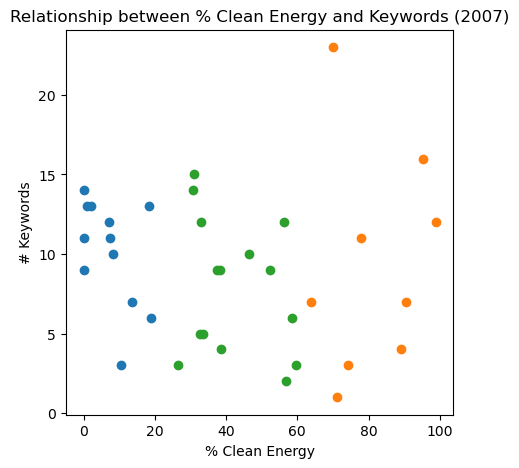

In [163]:
plt.figure(figsize=(5,5))
for i in result_07['label'].unique():
    sdf=result_07.loc[result_07['label']==i]
    plt.scatter(sdf['% Clean Energy'], sdf['keywords'])
    
plt.title('Relationship between % Clean Energy and Keywords (2007)') 
plt.xlabel('% Clean Energy') 
plt.ylabel('# Keywords')
plt.savefig('figs/CE_Keywords_2007.png')
plt.show()

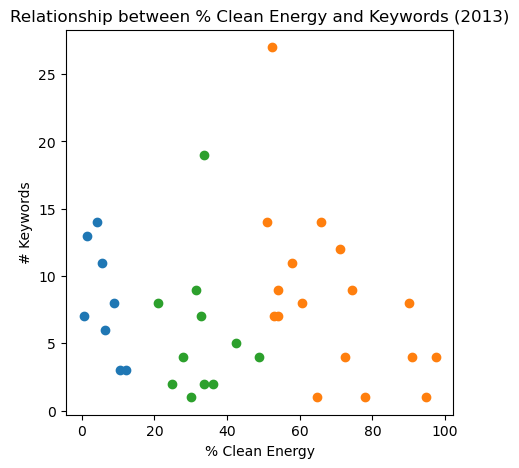

In [165]:
plt.figure(figsize=(5,5))
for i in result_13['label'].unique():
    sdf=result_13.loc[result_13['label']==i]
    plt.scatter(sdf['% Clean Energy'], sdf['keywords'])\
    
plt.title('Relationship between % Clean Energy and Keywords (2013)') 
plt.xlabel('% Clean Energy') 
plt.ylabel('# Keywords')
plt.savefig('figs/CE_Keywords_2013.png')
plt.show()

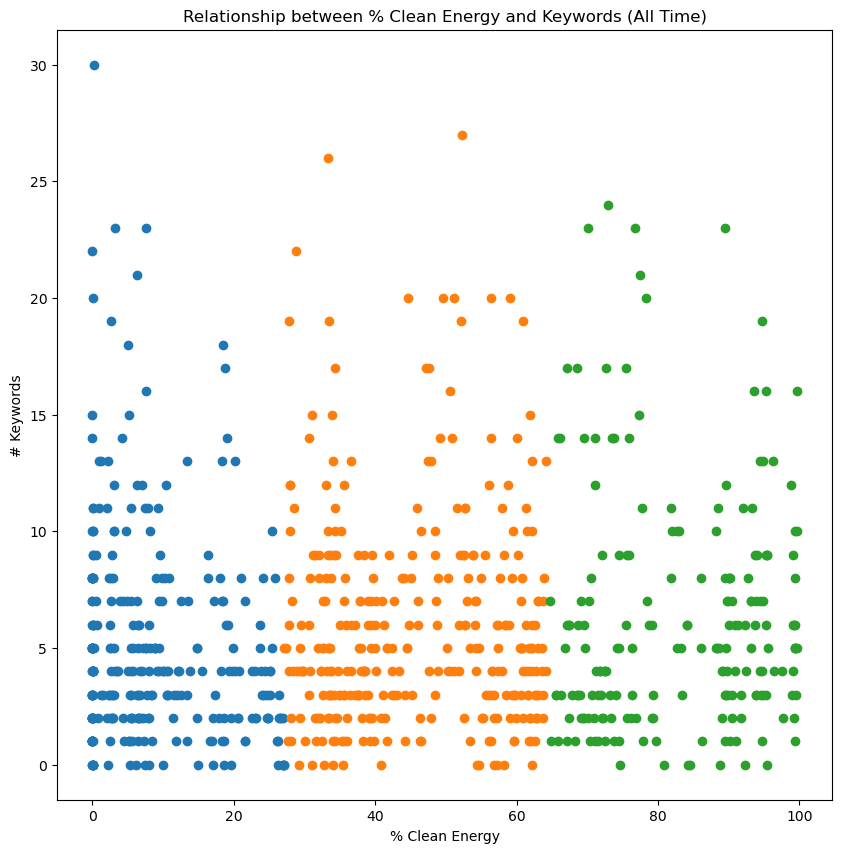

In [166]:
plt.figure(figsize=(10,10))
for i in result['label'].unique():
    sdf=result.loc[result['label']==i]
    plt.scatter(sdf['% Clean Energy'], sdf['keywords'])
    
plt.title('Relationship between % Clean Energy and Keywords (All Time)') 
plt.xlabel('% Clean Energy') 
plt.ylabel('# Keywords')
plt.savefig('figs/CE_Keywords_All.png')
plt.show()